In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("../../../data/df_tabmo_oneWeek.csv",low_memory=False)

"Quelles publicités génèrent une conversion? Pour les pubs classiques, celà correspond à un event_type de type click"

In [31]:
ev_type_without_media_type = data[data.event_media_type.isna()].event_type

In [32]:
ev_type_without_media_type[ev_type_without_media_type != 'click']

Series([], Name: event_type, dtype: object)

##### Aucune information sur l'event media type des click...

In [17]:
clicks_event = data[data["event_type"] == "click"]

In [18]:
clicks_event[clicks_event.duplicated(keep='first')]

,date,timestamp,event_auction_id,event_type,event_exchange,event_app_or_site,event_app_site_name,event_city,event_country,event_has_gps,...,schedule_start,schedule_end,line_updated_at,mediaplan_daily_budget,mediaplan_id,mediaplan_currency,deal_cpm,event_hash_geo_name,hash_deal_identifier,event_hash_branding_to_store
1886410,2019-08-19,2019-08-19 16:07:25.154 UTC,ec4777dc-2d29-4b29-9558-4d95d2a898ee,click,mopub,app,Paint by Numbers: New Coloring Pictures Book Free,NaN,GBR,False,...,2019-08-04 23:00:00 UTC,2019-09-01 22:59:59 UTC,2019-08-02 16:20:30.569 UTC,NaN,0647004e-6074-479b-9fbc-68a622ee5f1a,USD,NaN,743b98115e4ce339c03c39d92810de496076e2148a672c...,NaN,NaN


In [19]:
clicks_event.describe()

,event_connection_type,win_price,win_price_loc,event_ias_cpm,longitude,latitude,event_hash_ifa,event_hash_ip,event_imp_multiplier,mediaplan_daily_budget,deal_cpm
count,0.0,6566.0,6566.0,0.0,0.0,0.0,4.862000e+03,6.566000e+03,0.0,2082.000000,424.000000
mean,NaN,0.0,0.0,NaN,NaN,NaN,-4.994717e+17,-8.192457e+16,NaN,758.263449,8.716321
std,NaN,0.0,0.0,NaN,NaN,NaN,5.230091e+18,5.156824e+18,NaN,746.163443,3.957941
min,NaN,0.0,0.0,NaN,NaN,NaN,-9.219411e+18,-9.222204e+18,NaN,20.000000,3.220000
25%,NaN,0.0,0.0,NaN,NaN,NaN,-4.646648e+18,-4.277920e+18,NaN,170.000000,4.800000
50%,NaN,0.0,0.0,NaN,NaN,NaN,-8.426718e+17,-5.717070e+17,NaN,715.000000,9.000000
75%,NaN,0.0,0.0,NaN,NaN,NaN,3.820089e+18,4.296983e+18,NaN,1400.000000,9.000000
max,NaN,0.0,0.0,NaN,NaN,NaN,9.212582e+18,9.218535e+18,NaN,3000.000000,17.000000


Regardons alors les creative

In [35]:
clicks_event.creative_type.value_counts()

javascript      1537
mraid2          1167
banner           994
html             604
vast             560
mraid1           492
fullscreen       433
adspot           338
gpstore          298
audiospot        100
innercube         34
native             8
spinningcube       1
Name: creative_type, dtype: int64

In [45]:
crea_type_proportion_for_clicks = clicks_event.creative_type.value_counts().values

In [46]:
crea_type_proportion_for_clicks_labels = clicks_event.creative_type.value_counts().index

In [52]:
crea_type_proportion_for_clicks_labels[:5]

Index(['javascript', 'mraid2', 'banner', 'html', 'vast'], dtype='object')

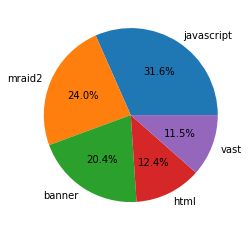

In [55]:
fig1, ax1 = plt.subplots()
ax1.pie(list(crea_type_proportion_for_clicks[:5]),labels=crea_type_proportion_for_clicks_labels[:5],autopct='%1.1f%%')
plt.show()

In [10]:
clicks_event.event_media_type.value_counts()

Series([], Name: event_media_type, dtype: int64)

([<matplotlib.patches.Wedge at 0x13577c810>,
 [Text(-0.8874995747726911, 0.649880377283614, 'app'),
  Text(0.8874996356188793, -0.6498802941899042, 'site')],
 [Text(-0.48409067714874054, 0.35448020579106215, '79.9%'),
  Text(0.4840907103375705, -0.3544801604672204, '20.1%')])

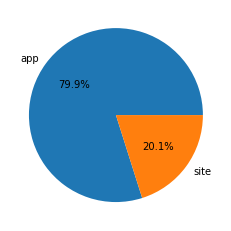

In [37]:
nb_de_app = sum(clicks_event['event_app_or_site'] == 'app')
nb_de_site = sum(clicks_event['event_app_or_site'] == 'site')

size = [nb_de_app,nb_de_site]

plt.pie(size,labels=['app','site'],autopct='%1.1f%%')

In [20]:
clicks_event.groupby('event_app_or_site')

,event_has_gps,event_connection_type,event_has_ifa,win_price,win_price_loc,event_ias_cpm,longitude,latitude,event_hash_ifa,event_hash_ip,event_imp_multiplier,mediaplan_daily_budget,deal_cpm
event_app_or_site,,,,,,,,,,,,,
app,False,0.0,False,0.0,0.0,0.0,0.0,0.0,-2.428431e+21,-7.240335e+20,0.0,1575028.5,1033.60
site,False,0.0,False,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.861168e+20,0.0,3676.0,2662.12
